In [91]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import linear_model
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np

pokedex = pd.read_csv('pokemon_alopez247.csv')
pokedex


,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


In [92]:
tipo1 = pokedex.Type_1

encoder = LabelEncoder()
tipo1 = encoder.fit_transform(tipo1)

tipo2 = pokedex.Type_2

encoder = LabelEncoder()
tipo2 = encoder.fit_transform(tipo2)

In [93]:
cor = pokedex.Color

encoder = LabelEncoder()
cor = encoder.fit_transform(cor)

cores = []
for i in range(0,len(cor)):
    cores.append(int(cor[i]))
    i += 1

Text(0.5, 0, 'cor')

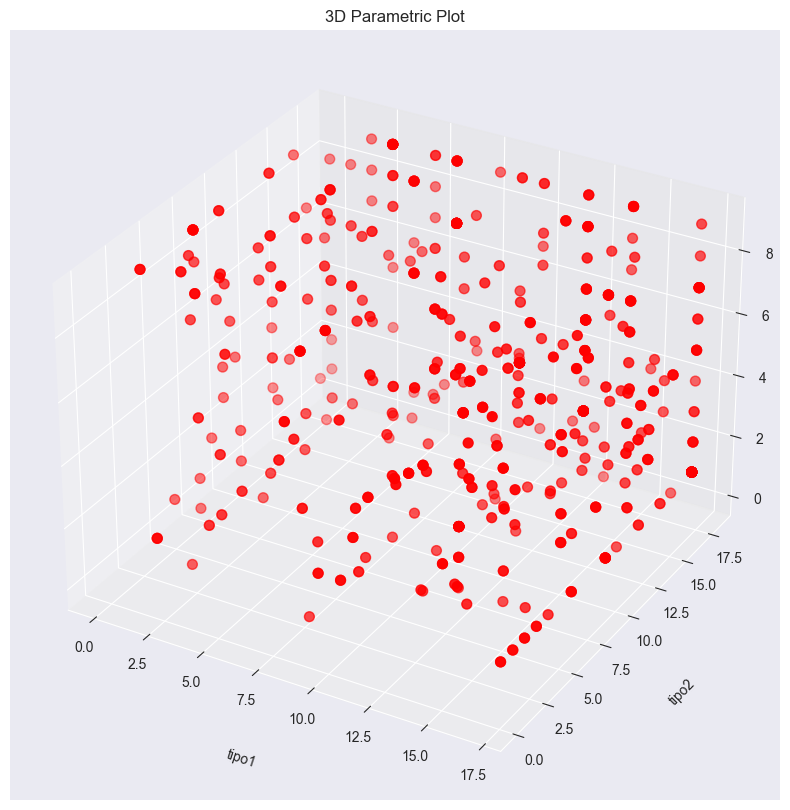

In [94]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter(tipo1, tipo2, cores, c = 'r' , s = 50)
ax.set_title('3D Parametric Plot')
ax.set_xlabel('tipo1', labelpad=20)
ax.set_ylabel('tipo2', labelpad=20)
ax.set_zlabel('cor', labelpad=20)

In [95]:
tipoum = []
tipodois = []

for i in range(0,len(tipo1)):
    tipoum.append(int(tipo1[i]))
    i += 1
    
for i in range(0,len(tipo2)):
    tipodois.append(int(tipo2[i]))
    i += 1

junta_tipos = list(zip(tipoum, tipodois))

tipos = [list(item) for item in junta_tipos]

tipos[34]

[4, 18]

In [96]:
tipagem = set(pokedex.Type_1)
tipagem = sorted(list(tipagem))
tipagem.append('Puro')

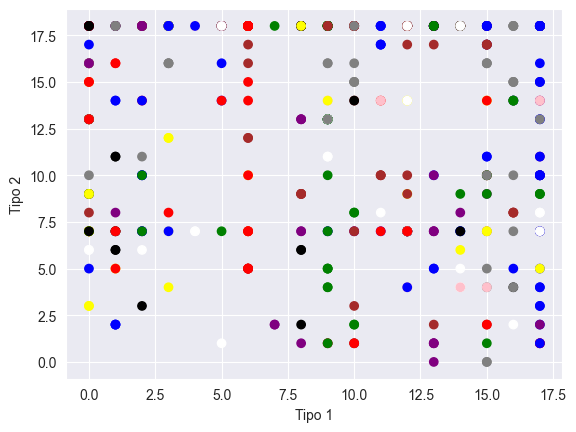

In [97]:
plt.xlabel("Tipo 1")
plt.ylabel('Tipo 2')
plt.scatter(tipoum, tipodois, c=pokedex.Color)

In [98]:
from sklearn.model_selection import train_test_split

# separa os dados que vão para treino e teste
# sendo 70% desses dados para treino e 30% para teste
entrada_treino, entrada_teste, saida_treino, saida_teste = train_test_split(
    tipos, pokedex.Color, test_size=0.2, random_state=0)

# mostra que a quantidade de dados foi certa para cada parametro
print(len(entrada_treino))
print(len(entrada_teste))

576
145


KNN

In [99]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(entrada_treino, saida_treino)

KNeighborsClassifier(n_neighbors=2)

In [100]:
# mostra a precisão do KNN
print(f"Precisão: {knn.score(entrada_teste, saida_teste) * 100:.2f}%")

Precisão: 37.24%


In [101]:
i = 0
for i in range(0,18): # len(entrada_teste)
  previsao = knn.predict([[i, 18]]) # calcula a previsao
  proba = knn.predict_proba([[i, 18]]) # calcula a probabilidade

  print(f"Previsões para o tipo \033[1m{tipagem[i]}\033[m: {previsao}") # mostra a previsao  

  print(f"Probabilidades para o o tipo \033[1m{tipagem[i]}\033[m: \n{proba}\n") # mostra a probabilidade 
  i += 1

Previsões para o tipo Bug: ['Purple']
Probabilidades para o o tipo Bug: 
[[0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]]

Previsões para o tipo Dark: ['Grey']
Probabilidades para o o tipo Dark: 
[[0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]]

Previsões para o tipo Dragon: ['Purple']
Probabilidades para o o tipo Dragon: 
[[0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]]

Previsões para o tipo Electric: ['White']
Probabilidades para o o tipo Electric: 
[[0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5]]

Previsões para o tipo Fairy: ['Pink']
Probabilidades para o o tipo Fairy: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Previsões para o tipo Fighting: ['Blue']
Probabilidades para o o tipo Fighting: 
[[0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]]

Previsões para o tipo Fire: ['Brown']
Probabilidades para o o tipo Fire: 
[[0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.5]]

Previsões para o tipo Flying: ['Brown']
Probabilidades para o o tipo Flying: 
[[0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]]

Previsões para o tipo Ghost: ['Blac

In [102]:
previstoknn = knn.predict(entrada_teste)
print(classification_report(saida_teste, previstoknn, zero_division=1))

              precision    recall  f1-score   support

       Black       0.33      0.27      0.30        11
        Blue       0.39      0.64      0.48        22
       Brown       0.39      0.67      0.49        18
       Green       0.77      0.43      0.56        23
        Grey       0.28      0.64      0.39        11
        Pink       0.40      0.50      0.44         4
      Purple       0.23      0.21      0.22        14
         Red       0.38      0.21      0.27        14
       White       0.00      0.00      0.00        11
      Yellow       1.00      0.00      0.00        17

    accuracy                           0.37       145
   macro avg       0.42      0.36      0.32       145
weighted avg       0.46      0.37      0.33       145



RANDOM FOREST

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
#rf = RandomForestClassifier(n_estimators=1500, criterion='entropy', min_samples_split=10, max_depth=24, random_state=2)
rf.fit(entrada_treino, saida_treino)

RandomForestClassifier()

In [104]:
print(f'{rf.score(entrada_teste, saida_teste)* 100:.2f}%')

40.69%


In [105]:
for i in range(0,18): # len(entrada_teste)
  previsao = rf.predict([[i, 18]]) # calcula a previsao
  proba = rf.predict_proba([[i, 18]]) # calcula a probabilidade

  print(f"Previsões para o tipo \033[1m{tipagem[i]}\033[m: {previsao}") # mostra a previsao  

  print(f"Probabilidades para o o tipo \033[1m{tipagem[i]}\033[m: \n{proba}\n") # mostra a probabilidade 

Previsões para o tipo Bug: ['Red']
Probabilidades para o o tipo Bug: 
[[0.08070617 0.         0.07789802 0.07358658 0.1740975  0.
  0.08222436 0.42825583 0.08323152 0.        ]]

Previsões para o tipo Dark: ['Purple']
Probabilidades para o o tipo Dark: 
[[0.00111111 0.         0.00111111 0.00111111 0.43822619 0.
  0.55510714 0.00222222 0.00111111 0.        ]]

Previsões para o tipo Dragon: ['Blue']
Probabilidades para o o tipo Dragon: 
[[0.         0.35098788 0.         0.12349467 0.         0.
  0.20519732 0.10559346 0.13350568 0.08122098]]

Previsões para o tipo Electric: ['Yellow']
Probabilidades para o o tipo Electric: 
[[0.         0.21213562 0.         0.04820911 0.         0.04204964
  0.         0.08871955 0.11934919 0.48953689]]

Previsões para o tipo Fairy: ['Pink']
Probabilidades para o o tipo Fairy: 
[[0.         0.08253687 0.         0.         0.         0.46350783
  0.07073649 0.         0.38321881 0.        ]]

Previsões para o tipo Fighting: ['Grey']
Probabilidades par

In [106]:
previstorf = rf.predict(entrada_teste)
print(classification_report(saida_teste, previstorf))

              precision    recall  f1-score   support

       Black       1.00      0.27      0.43        11
        Blue       0.38      0.59      0.46        22
       Brown       0.46      0.67      0.55        18
       Green       0.77      0.43      0.56        23
        Grey       0.33      0.45      0.38        11
        Pink       0.50      0.50      0.50         4
      Purple       0.21      0.21      0.21        14
         Red       0.32      0.50      0.39        14
       White       0.29      0.18      0.22        11
      Yellow       0.29      0.12      0.17        17

    accuracy                           0.41       145
   macro avg       0.46      0.39      0.39       145
weighted avg       0.46      0.41      0.40       145



DECISION TREE

In [107]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(entrada_treino, saida_treino)

DecisionTreeClassifier()

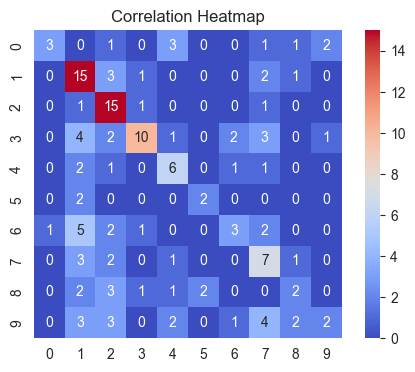

In [108]:
from sklearn.metrics import confusion_matrix

previsto = dtc.predict(entrada_teste)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(saida_teste, previsto), annot=True, cmap='coolwarm', cbar=True, square=True)

plt.title("Correlation Heatmap")
plt.show()

In [109]:
print(f'{dtc.score(entrada_teste, saida_teste)* 100:.2f}%')

44.83%


In [110]:
for i in range(0,18): # len(entrada_teste)
  previsao = dtc.predict([[i, 18]]) # calcula a previsao
  proba = dtc.predict_proba([[i, 18]]) # calcula a probabilidade

  print(f"Previsões para o tipo \033[1m{tipagem[i]}\033[m: {previsao}") # mostra a previsao  

  print(f"Probabilidades para o o tipo \033[1m{tipagem[i]}\033[m: \n{proba}\n") # mostra a probabilidade

Previsões para o tipo Bug: ['Red']
Probabilidades para o o tipo Bug: 
[[0.08333333 0.         0.08333333 0.08333333 0.16666667 0.
  0.08333333 0.41666667 0.08333333 0.        ]]

Previsões para o tipo Dark: ['Grey']
Probabilidades para o o tipo Dark: 
[[0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]]

Previsões para o tipo Dragon: ['Blue']
Probabilidades para o o tipo Dragon: 
[[0.         0.33333333 0.         0.11111111 0.         0.
  0.22222222 0.11111111 0.11111111 0.11111111]]

Previsões para o tipo Electric: ['Yellow']
Probabilidades para o o tipo Electric: 
[[0.         0.2173913  0.         0.04347826 0.         0.04347826
  0.         0.08695652 0.13043478 0.47826087]]

Previsões para o tipo Fairy: ['Pink']
Probabilidades para o o tipo Fairy: 
[[0.         0.07692308 0.         0.         0.         0.46153846
  0.07692308 0.         0.38461538 0.        ]]

Previsões para o tipo Fighting: ['Brown']
Probabilidades para o o tipo Fighting: 
[[0.         0.11764706 0.29411765 0.      

In [111]:
previstodtc = dtc.predict(entrada_teste)
print(classification_report(saida_teste, previstodtc))

              precision    recall  f1-score   support

       Black       0.75      0.27      0.40        11
        Blue       0.41      0.68      0.51        22
       Brown       0.47      0.83      0.60        18
       Green       0.71      0.43      0.54        23
        Grey       0.43      0.55      0.48        11
        Pink       0.50      0.50      0.50         4
      Purple       0.43      0.21      0.29        14
         Red       0.33      0.50      0.40        14
       White       0.29      0.18      0.22        11
      Yellow       0.40      0.12      0.18        17

    accuracy                           0.45       145
   macro avg       0.47      0.43      0.41       145
weighted avg       0.48      0.45      0.42       145



Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(var_smoothing=1e-1)
nb.fit(entrada_treino, saida_treino)

GaussianNB(var_smoothing=0.1)

In [113]:
nb.get_params()

{'priors': None, 'var_smoothing': 0.1}

In [114]:
print(f'{nb.score(entrada_teste, saida_teste)* 100:.2f}%')

21.38%


In [115]:
for i in range(0,18): # len(entrada_teste)
  previsao = nb.predict([[i, 18]]) # calcula a previsao
  proba = nb.predict_proba([[i, 18]]) # calcula a probabilidade

  print(f"Previsões para o tipo \033[1m{tipagem[i]}\033[m: {previsao}") # mostra a previsao  

  print(f"Probabilidades para o o tipo \033[1m{tipagem[i]}\033[m: \n{proba}\n") # mostra a probabilidade 

Previsões para o tipo Bug: ['Yellow']
Probabilidades para o o tipo Bug: 
[[0.05115338 0.1001012  0.05416647 0.05514898 0.12353214 0.01969443
  0.06938344 0.21440251 0.09207916 0.22033827]]

Previsões para o tipo Dark: ['Yellow']
Probabilidades para o o tipo Dark: 
[[0.04976945 0.10647235 0.06892424 0.06560786 0.12319903 0.02531174
  0.07332618 0.19616264 0.09077953 0.20044698]]

Previsões para o tipo Dragon: ['Yellow']
Probabilidades para o o tipo Dragon: 
[[0.04778793 0.11268339 0.08522954 0.07604377 0.12219676 0.03171452
  0.07663914 0.17838285 0.0886908  0.1806313 ]]

Previsões para o tipo Electric: ['Yellow']
Probabilidades para o o tipo Electric: 
[[0.04532552 0.11877112 0.102515   0.08595339 0.12065337 0.03877517
  0.07929261 0.16137734 0.08594796 0.16138852]]

Previsões para o tipo Fairy: ['Red']
Probabilidades para o o tipo Fairy: 
[[0.0425204  0.12483906 0.12009492 0.09486693 0.11874283 0.04632014
  0.08131418 0.14542716 0.08272176 0.14315261]]

Previsões para o tipo Fighting:

In [116]:
previstonb = nb.predict(entrada_teste)
print(classification_report(saida_teste, previstonb, zero_division=1))

              precision    recall  f1-score   support

       Black       1.00      0.00      0.00        11
        Blue       0.24      0.59      0.34        22
       Brown       0.22      0.67      0.33        18
       Green       1.00      0.00      0.00        23
        Grey       1.00      0.00      0.00        11
        Pink       1.00      0.00      0.00         4
      Purple       1.00      0.00      0.00        14
         Red       0.23      0.36      0.28        14
       White       1.00      0.00      0.00        11
      Yellow       0.07      0.06      0.06        17

    accuracy                           0.21       145
   macro avg       0.68      0.17      0.10       145
weighted avg       0.60      0.21      0.13       145



SVM

In [117]:
SVM = svm.SVC(kernel="rbf", gamma='auto', C=3, probability=True)
SVM.fit(entrada_treino, saida_treino)

SVC(C=3, gamma='auto', probability=True)

In [118]:
print(f"Precisão para o linear: {SVM.score(entrada_teste, saida_teste) * 100:.2f}%\n")

Precisão para o linear: 42.76%



In [119]:
for i in range(0,18): # len(entrada_teste)
  previsao = SVM.predict([[i, 18]]) # calcula a previsao
  proba = SVM.predict_proba([[i, 18]]) # calcula a probabilidade

  print(f"Previsões para o tipo \033[1m{tipagem[i]}\033[m: {previsao}") # mostra a previsao  

  print(f"Probabilidades para o o tipo \033[1m{tipagem[i]}\033[m: \n{proba}\n") # mostra a probabilidade 

Previsões para o tipo Bug: ['Red']
Probabilidades para o o tipo Bug: 
[[0.0421875  0.05742381 0.101945   0.07267567 0.14655839 0.02995829
  0.09965654 0.33508892 0.06867428 0.0458316 ]]

Previsões para o tipo Dark: ['Grey']
Probabilidades para o o tipo Dark: 
[[0.03443644 0.10359118 0.06684544 0.06252493 0.26325022 0.02508882
  0.25335758 0.07714209 0.06519247 0.04857083]]

Previsões para o tipo Dragon: ['Blue']
Probabilidades para o o tipo Dragon: 
[[0.02081782 0.42730347 0.03710513 0.0608416  0.04682714 0.01822558
  0.13739051 0.08524236 0.07293908 0.09330731]]

Previsões para o tipo Electric: ['Yellow']
Probabilidades para o o tipo Electric: 
[[0.02496027 0.24997008 0.03270017 0.06121165 0.03197781 0.0570797
  0.05682043 0.10932287 0.11546452 0.26049249]]

Previsões para o tipo Fairy: ['Pink']
Probabilidades para o o tipo Fairy: 
[[0.02642034 0.14405521 0.05748748 0.04059845 0.0725872  0.22190712
  0.08780283 0.04578346 0.23171098 0.07164694]]

Previsões para o tipo Fighting: ['Brow

In [120]:
previstosvm = SVM.predict(entrada_teste)
print(classification_report(saida_teste, previstosvm))

              precision    recall  f1-score   support

       Black       1.00      0.27      0.43        11
        Blue       0.36      0.59      0.45        22
       Brown       0.44      0.78      0.56        18
       Green       0.77      0.43      0.56        23
        Grey       0.35      0.55      0.43        11
        Pink       0.50      0.50      0.50         4
      Purple       0.50      0.21      0.30        14
         Red       0.32      0.50      0.39        14
       White       0.40      0.18      0.25        11
      Yellow       0.29      0.12      0.17        17

    accuracy                           0.43       145
   macro avg       0.49      0.41      0.40       145
weighted avg       0.49      0.43      0.41       145



------------- PCA -------------

In [121]:
pca = PCA(n_components=1)
duas_dimensoes = pca.fit_transform(tipos)
duas_dimensoes

array([[-3.74613306e-01],
       [-3.74613306e-01],
       [-3.74613306e-01],
       [-4.69413261e+00],
       [-4.69413261e+00],
       [-1.50832828e+00],
       [ 5.83443096e+00],
       [ 5.83443096e+00],
       [ 5.83443096e+00],
       [-1.04369855e+01],
       [-1.04369855e+01],
       [-7.25118114e+00],
       [-8.98889259e+00],
       [-8.98889259e+00],
       [-8.98889259e+00],
       [ 4.23452457e+00],
       [ 4.23452457e+00],
       [ 4.23452457e+00],
       [ 1.04872024e+00],
       [ 1.04872024e+00],
       [ 4.23452457e+00],
       [ 4.23452457e+00],
       [ 2.00586239e+00],
       [ 2.00586239e+00],
       [-7.56555904e+00],
       [-7.56555904e+00],
       [-8.65564041e-01],
       [-8.65564041e-01],
       [ 2.00586239e+00],
       [ 2.00586239e+00],
       [ 4.32281099e+00],
       [ 2.00586239e+00],
       [ 2.00586239e+00],
       [ 4.32281099e+00],
       [-6.60841690e+00],
       [-6.60841690e+00],
       [-4.69413261e+00],
       [-4.69413261e+00],
       [ 5.1

In [122]:
t = duas_dimensoes[24]
num = float(t[0])
num

-7.56555903762643

In [123]:
# separa os dados que vão para treino e teste
# sendo 70% desses dados para treino e 30% para teste
entrada_treinoPCA, entrada_testePCA, saida_treinoPCA, saida_testePCA = train_test_split(
    duas_dimensoes, pokedex.Color, test_size=0.2, random_state=0)

# mostra que a quantidade de dados foi certa para cada parametro
print(len(entrada_treinoPCA))
print(len(entrada_testePCA))

576
145


KNN COM PCA

In [124]:
knnPCA = KNeighborsClassifier(n_neighbors=5)
knnPCA.fit(entrada_treinoPCA, saida_treinoPCA)

KNeighborsClassifier()

In [125]:
print(f'{knnPCA.score(entrada_testePCA, saida_testePCA) * 100:.2f}%')

39.31%


In [126]:
print(f"Previsões para o tipo \033[1;31mfogo\033[m: \033[1m{knnPCA.predict([[-4.694132610337242]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;31mfogo\033[m:\n\033[1m{knnPCA.predict_proba([[-4.694132610337242]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;34mágua\033[m: \033[1m{knnPCA.predict([[5.834430956389779]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;34mágua\033[m:\n\033[1m{knnPCA.predict_proba([[5.834430956389779]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;32mgrama\033[m: \033[1m{knnPCA.predict([[-1.8227061830480542]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;32mgrama\033[m:\n\033[1m{knnPCA.predict_proba([[-1.8227061830480542]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;33melétrico\033[m: \033[1m{knnPCA.predict([[-7.56555903762643]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;33melétrico\033[m:\n\033[1m{knnPCA.predict_proba([[-7.56555903762643]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;35mfada\033[m: \033[1m{knnPCA.predict([[-6.608416895196701]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;35mfada\033[m:\n\033[1m{knnPCA.predict_proba([[-6.608416895196701]])}\033[m\n")  # mostra a probabilidade

Previsões para o tipo fogo: ['Red']
Probabilidades para o o tipo fogo:
[[0.  0.  0.2 0.  0.  0.  0.  0.4 0.  0.4]]

Previsões para o tipo água: ['Blue']
Probabilidades para o o tipo água:
[[0.  0.8 0.  0.  0.2 0.  0.  0.  0.  0. ]]

Previsões para o tipo grama: ['Green']
Probabilidades para o o tipo grama:
[[0.  0.  0.  0.8 0.  0.2 0.  0.  0.  0. ]]

Previsões para o tipo elétrico: ['White']
Probabilidades para o o tipo elétrico:
[[0.  0.2 0.  0.  0.  0.  0.  0.  0.4 0.4]]

Previsões para o tipo fada: ['Pink']
Probabilidades para o o tipo fada:
[[0.  0.  0.  0.  0.  0.6 0.  0.  0.4 0. ]]



In [127]:
previstoknnPCA = knnPCA.predict(entrada_testePCA)
print(classification_report(saida_teste, previstoknnPCA))

              precision    recall  f1-score   support

       Black       0.22      0.36      0.28        11
        Blue       0.47      0.73      0.57        22
       Brown       0.53      0.50      0.51        18
       Green       0.67      0.43      0.53        23
        Grey       0.45      0.45      0.45        11
        Pink       0.11      0.50      0.17         4
      Purple       0.25      0.07      0.11        14
         Red       0.50      0.64      0.56        14
       White       0.00      0.00      0.00        11
      Yellow       0.33      0.06      0.10        17

    accuracy                           0.39       145
   macro avg       0.35      0.38      0.33       145
weighted avg       0.41      0.39      0.37       145



RANDOM FOREST COM PCA

In [128]:
#rfPCA = RandomForestClassifier()
rfPCA = RandomForestClassifier(n_estimators=1500, criterion='entropy', min_samples_split=10, max_depth=24, random_state=2)
rfPCA.fit(entrada_treinoPCA, saida_treinoPCA)

RandomForestClassifier(criterion='entropy', max_depth=24, min_samples_split=10,
                       n_estimators=1500, random_state=2)

In [129]:
print(f'{rfPCA.score(entrada_testePCA, saida_testePCA) * 100:.2f}%')

43.45%


In [130]:
print(f"Previsões para o tipo \033[1;31mfogo\033[m: \033[1m{rfPCA.predict([[-4.694132610337242]])}\033[m") # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;31mfogo\033[m:\n\033[1m{rfPCA.predict_proba([[-4.694132610337242]])}\033[m\n") # mostra a probabilidade

print(f"Previsões para o tipo \033[1;34mágua\033[m: \033[1m{rfPCA.predict([[5.834430956389779]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;34mágua\033[m:\n\033[1m{rfPCA.predict_proba([[5.834430956389779]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;32mgrama\033[m: \033[1m{rfPCA.predict([[-1.8227061830480542]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;32mgrama\033[m:\n\033[1m{rfPCA.predict_proba([[-1.8227061830480542]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;33melétrico\033[m: \033[1m{rfPCA.predict([[-7.56555903762643]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;33melétrico\033[m:\n\033[1m{rfPCA.predict_proba([[-7.56555903762643]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;35mfada\033[m: \033[1m{rfPCA.predict([[-6.608416895196701]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;35mfada\033[m:\n\033[1m{rfPCA.predict_proba([[-6.608416895196701]])}\033[m\n")  # mostra a probabilidade

Previsões para o tipo fogo: ['Red']
Probabilidades para o o tipo fogo:
[[0.00000000e+00 2.39573292e-04 2.83258093e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 5.72609827e-01
  0.00000000e+00 1.43892506e-01]]

Previsões para o tipo água: ['Blue']
Probabilidades para o o tipo água:
[[0.         0.60202189 0.08458863 0.04177083 0.0221725  0.06214336
  0.04215446 0.12355942 0.         0.02158891]]

Previsões para o tipo grama: ['Green']
Probabilidades para o o tipo grama:
[[0.         0.0396814  0.12069453 0.68110684 0.         0.08074823
  0.         0.         0.         0.077769  ]]

Previsões para o tipo elétrico: ['Yellow']
Probabilidades para o o tipo elétrico:
[[0.00000000e+00 2.16923504e-01 1.42857143e-04 4.28899012e-02
  0.00000000e+00 4.46114717e-02 0.00000000e+00 8.81884577e-02
  1.32069003e-01 4.75174805e-01]]

Previsões para o tipo fada: ['Pink']
Probabilidades para o o tipo fada:
[[0.         0.08733802 0.         0.         0.01849724 0.42793257
  0.0821

In [131]:
previstorfPCA = rfPCA.predict(entrada_testePCA)
print(classification_report(saida_teste, previstorfPCA))

              precision    recall  f1-score   support

       Black       0.75      0.27      0.40        11
        Blue       0.38      0.68      0.49        22
       Brown       0.36      0.67      0.47        18
       Green       0.65      0.48      0.55        23
        Grey       0.50      0.45      0.48        11
        Pink       0.33      0.25      0.29         4
      Purple       0.43      0.21      0.29        14
         Red       0.41      0.64      0.50        14
       White       0.00      0.00      0.00        11
      Yellow       0.44      0.24      0.31        17

    accuracy                           0.43       145
   macro avg       0.43      0.39      0.38       145
weighted avg       0.44      0.43      0.41       145



DECISION TREE COM PCA

In [132]:
dtcPCA = DecisionTreeClassifier()
dtcPCA.fit(entrada_treinoPCA, saida_treinoPCA)

DecisionTreeClassifier()

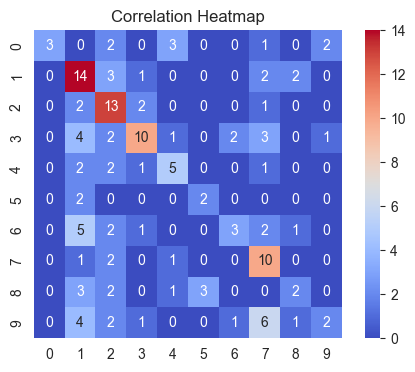

In [133]:
previsto = dtcPCA.predict(entrada_testePCA)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(saida_testePCA, previsto), annot=True, cmap='coolwarm', cbar=True, square=True)

plt.title("Correlation Heatmap")
plt.show()

In [134]:
print(f'{dtcPCA.score(entrada_testePCA, saida_testePCA) * 100:.2f}%')

44.14%


In [135]:
print(f"Previsões para o tipo \033[1;31mfogo\033[m: \033[1m{dtcPCA.predict([[-4.694132610337242]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;31mfogo\033[m:\n\033[1m{dtcPCA.predict_proba([[-4.694132610337242]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;34mágua\033[m: \033[1m{dtcPCA.predict([[5.834430956389779]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;34mágua\033[m:\n\033[1m{dtcPCA.predict_proba([[5.834430956389779]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;32mgrama\033[m: \033[1m{dtcPCA.predict([[-1.8227061830480542]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;32mgrama\033[m:\n\033[1m{dtcPCA.predict_proba([[-1.8227061830480542]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;33melétrico\033[m: \033[1m{dtcPCA.predict([[-7.56555903762643]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;33melétrico\033[m:\n\033[1m{dtcPCA.predict_proba([[-7.56555903762643]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;35mfada\033[m: \033[1m{dtcPCA.predict([[-6.608416895196701]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;35mfada\033[m:\n\033[1m{dtcPCA.predict_proba([[-6.608416895196701]])}\033[m\n")  # mostra a probabilidade

Previsões para o tipo fogo: ['Red']
Probabilidades para o o tipo fogo:
[[0.         0.         0.28571429 0.         0.         0.
  0.         0.57142857 0.         0.14285714]]

Previsões para o tipo água: ['Blue']
Probabilidades para o o tipo água:
[[0.         0.60416667 0.08333333 0.04166667 0.02083333 0.0625
  0.04166667 0.125      0.         0.02083333]]

Previsões para o tipo grama: ['Green']
Probabilidades para o o tipo grama:
[[0.   0.04 0.12 0.68 0.   0.08 0.   0.   0.   0.08]]

Previsões para o tipo elétrico: ['Yellow']
Probabilidades para o o tipo elétrico:
[[0.         0.2173913  0.         0.04347826 0.         0.04347826
  0.         0.08695652 0.13043478 0.47826087]]

Previsões para o tipo fada: ['Pink']
Probabilidades para o o tipo fada:
[[0.         0.07692308 0.         0.         0.         0.46153846
  0.07692308 0.         0.38461538 0.        ]]



In [136]:
previstodtcPCA = dtcPCA.predict(entrada_testePCA)
print(classification_report(saida_teste, previstodtcPCA))

              precision    recall  f1-score   support

       Black       1.00      0.27      0.43        11
        Blue       0.38      0.64      0.47        22
       Brown       0.43      0.72      0.54        18
       Green       0.62      0.43      0.51        23
        Grey       0.45      0.45      0.45        11
        Pink       0.40      0.50      0.44         4
      Purple       0.50      0.21      0.30        14
         Red       0.38      0.71      0.50        14
       White       0.33      0.18      0.24        11
      Yellow       0.40      0.12      0.18        17

    accuracy                           0.44       145
   macro avg       0.49      0.42      0.41       145
weighted avg       0.49      0.44      0.42       145



NAIVE BAYES COM PCA

In [137]:
nbPCA = GaussianNB()
nbPCA.fit(entrada_treinoPCA, saida_treinoPCA)

GaussianNB()

In [138]:
print(f'{nbPCA.score(entrada_testePCA, saida_testePCA) * 100:.2f}%')

22.07%


In [139]:
print(f"Previsões para o tipo \033[1;31mfogo\033[m: \033[1m{nbPCA.predict([[-4.694132610337242]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;31mfogo\033[m:\n\033[1m{nbPCA.predict_proba([[-4.694132610337242]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;34mágua\033[m: \033[1m{nbPCA.predict([[5.834430956389779]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;34mágua\033[m:\n\033[1m{nbPCA.predict_proba([[5.834430956389779]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;32mgrama\033[m: \033[1m{nbPCA.predict([[-1.8227061830480542]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;32mgrama\033[m:\n\033[1m{nbPCA.predict_proba([[-1.8227061830480542]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;33melétrico\033[m: \033[1m{nbPCA.predict([[-7.56555903762643]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;33melétrico\033[m:\n\033[1m{nbPCA.predict_proba([[-7.56555903762643]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;35mfada\033[m: \033[1m{nbPCA.predict([[-6.608416895196701]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;35mfada\033[m:\n\033[1m{nbPCA.predict_proba([[-6.608416895196701]])}\033[m\n")  # mostra a probabilidade

Previsões para o tipo fogo: ['Red']
Probabilidades para o o tipo fogo:
[[0.054629   0.12040766 0.12853346 0.10089049 0.10075515 0.05014216
  0.08453573 0.14226163 0.08288491 0.1349598 ]]

Previsões para o tipo água: ['Blue']
Probabilidades para o o tipo água:
[[0.01807027 0.28750707 0.17940458 0.08918669 0.10245644 0.08218595
  0.09766087 0.05992329 0.05979641 0.02380843]]

Previsões para o tipo grama: ['Brown']
Probabilidades para o o tipo grama:
[[0.04723654 0.14608514 0.18170773 0.11775034 0.09208017 0.06403204
  0.0848152  0.10494546 0.07183203 0.08951535]]

Previsões para o tipo elétrico: ['Red']
Probabilidades para o o tipo elétrico:
[[0.05368016 0.09799805 0.07172573 0.07171551 0.11306908 0.03454773
  0.08270181 0.19393759 0.0951499  0.18547444]]

Previsões para o tipo fada: ['Red']
Probabilidades para o o tipo fada:
[[0.05511837 0.1053716  0.08967043 0.08224772 0.10877189 0.03977484
  0.08369002 0.17523312 0.0911512  0.16897082]]



In [140]:
previstonbPCA = nbPCA.predict(entrada_testePCA)
print(classification_report(saida_teste, previstonbPCA, zero_division=1))

              precision    recall  f1-score   support

       Black       1.00      0.00      0.00        11
        Blue       0.25      0.59      0.36        22
       Brown       0.20      0.56      0.30        18
       Green       1.00      0.00      0.00        23
        Grey       1.00      0.00      0.00        11
        Pink       1.00      0.00      0.00         4
      Purple       1.00      0.00      0.00        14
         Red       0.20      0.64      0.31        14
       White       1.00      0.00      0.00        11
      Yellow       1.00      0.00      0.00        17

    accuracy                           0.22       145
   macro avg       0.77      0.18      0.10       145
weighted avg       0.71      0.22      0.12       145



SVM COM PCA

In [141]:
SVMPCA = svm.SVC(kernel="rbf", gamma='auto', C=1000, probability=True)
SVMPCA.fit(entrada_treinoPCA, saida_treinoPCA)

SVC(C=1000, gamma='auto', probability=True)

In [142]:
print(f'{SVMPCA.score(entrada_testePCA, saida_testePCA) * 100:.2f}%')

41.38%


In [143]:
print(f"Previsões para o tipo \033[1;31mfogo\033[m: \033[1m{SVMPCA.predict([[-4.694132610337242]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;31mfogo\033[m:\n\033[1m{SVMPCA.predict_proba([[-4.694132610337242]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;34mágua\033[m: \033[1m{SVMPCA.predict([[5.834430956389779]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;34mágua\033[m:\n\033[1m{SVMPCA.predict_proba([[5.834430956389779]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;32mgrama\033[m: \033[1m{SVMPCA.predict([[-1.8227061830480542]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;32mgrama\033[m:\n\033[1m{SVMPCA.predict_proba([[-1.8227061830480542]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;33melétrico\033[m: \033[1m{SVMPCA.predict([[-7.56555903762643]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;33melétrico\033[m:\n\033[1m{SVMPCA.predict_proba([[-7.56555903762643]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;35mfada\033[m: \033[1m{SVMPCA.predict([[-6.608416895196701]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;35mfada\033[m:\n\033[1m{SVMPCA.predict_proba([[-6.608416895196701]])}\033[m\n")  # mostra a probabilidade

Previsões para o tipo fogo: ['Red']
Probabilidades para o o tipo fogo:
[[0.00868216 0.22091082 0.20429133 0.10165324 0.05515859 0.02229828
  0.05567359 0.13626928 0.09116325 0.10389946]]

Previsões para o tipo água: ['Blue']
Probabilidades para o o tipo água:
[[0.03089509 0.19991022 0.16100162 0.09523232 0.08952812 0.06888795
  0.09137881 0.1156437  0.06655946 0.08096269]]

Previsões para o tipo grama: ['Green']
Probabilidades para o o tipo grama:
[[0.02325186 0.17940731 0.18236678 0.14690991 0.05875654 0.07476456
  0.07476261 0.12060025 0.03491229 0.10426789]]

Previsões para o tipo elétrico: ['Yellow']
Probabilidades para o o tipo elétrico:
[[0.04112504 0.2053712  0.14797783 0.10777173 0.07148462 0.07082456
  0.03659445 0.1312511  0.08738409 0.10021538]]

Previsões para o tipo fada: ['Pink']
Probabilidades para o o tipo fada:
[[0.04070003 0.19790573 0.13604873 0.0794199  0.10735301 0.10298655
  0.10429733 0.08067865 0.0844058  0.06620428]]



In [144]:
previstoSVMPCA = SVMPCA.predict(entrada_testePCA)
print(classification_report(saida_teste, previstoSVMPCA))

              precision    recall  f1-score   support

       Black       0.67      0.18      0.29        11
        Blue       0.41      0.59      0.48        22
       Brown       0.38      0.72      0.50        18
       Green       0.75      0.39      0.51        23
        Grey       0.40      0.36      0.38        11
        Pink       0.20      0.25      0.22         4
      Purple       0.31      0.36      0.33        14
         Red       0.42      0.57      0.48        14
       White       0.25      0.09      0.13        11
      Yellow       0.40      0.24      0.30        17

    accuracy                           0.41       145
   macro avg       0.42      0.38      0.36       145
weighted avg       0.45      0.41      0.40       145



------------- FEATURE SCALING -------------

In [145]:
FS = StandardScaler()
padronizado = FS.fit_transform(tipos)
padronizado

array([[-0.10281676, -0.10836834],
       [-0.10281676, -0.10836834],
       [-0.10281676, -0.10836834],
       ...,
       [ 0.9767592 , -1.74753422],
       [ 0.79682987, -1.01901605],
       [-0.64260473,  0.62014983]])

In [146]:
padronizado[3]

array([-0.64260473,  0.80227937])

In [147]:
salva = set(padronizado[:,0,])
salva = sorted(list(salva))
x = np.array(salva).tolist()
x

[-1.7221806876636607,
 -1.5422513620868603,
 -1.36232203651006,
 -1.1823927109332597,
 -1.0024633853564593,
 -0.8225340597796589,
 -0.6426047342028585,
 -0.4626754086260581,
 -0.2827460830492577,
 -0.10281675747245732,
 0.07711256810434307,
 0.25704189368114344,
 0.43697121925794385,
 0.6169005448347442,
 0.7968298704115446,
 0.9767591959883449,
 1.1566885215651455,
 1.3366178471419456]

In [148]:
# separa os dados que vão para treino e teste
# sendo 70% desses dados para treino e 30% para teste
entrada_treinoFS, entrada_testeFS, saida_treinoFS, saida_testeFS = train_test_split(
    padronizado, pokedex.Color, test_size=0.2, random_state=0)

# mostra que a quantidade de dados foi certa para cada parametro
print(len(entrada_treinoFS))
print(len(entrada_testeFS))

576
145


KNN COM FEATURE SCALING

In [149]:
knnFS = KNeighborsClassifier(n_neighbors=4)
knnFS.fit(entrada_treinoFS, saida_treinoFS)

KNeighborsClassifier(n_neighbors=4)

In [150]:
print(f'{knnFS.score(entrada_testeFS, saida_testeFS) * 100:.2f}%')

37.24%


In [151]:
print(f"Previsões para o tipo \033[1;31mfogo\033[m: \033[1m{knnFS.predict([[-0.64260473, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;31mfogo\033[m:\n\033[1m{knnFS.predict_proba([[-0.64260473, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;34mágua\033[m: \033[1m{knnFS.predict([[1.336618, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;34mágua\033[m:\n\033[1m{knnFS.predict_proba([[1.336618, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;32mgrama\033[m: \033[1m{knnFS.predict([[-0.10281675747245732, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;32mgrama\033[m:\n\033[1m{knnFS.predict_proba([[-0.10281675747245732, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;33melétrico\033[m: \033[1m{knnFS.predict([[-1.1823927109332597, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;33melétrico\033[m:\n\033[1m{knnFS.predict_proba([[-1.1823927109332597, 0.802279]])}\033[m\n")  # mostra a probabilidade

Previsões para o tipo fogo: ['Yellow']
Probabilidades para o o tipo fogo:
[[0.   0.   0.25 0.   0.   0.   0.   0.25 0.   0.5 ]]

Previsões para o tipo água: ['Blue']
Probabilidades para o o tipo água:
[[0.   0.75 0.   0.   0.25 0.   0.   0.   0.   0.  ]]

Previsões para o tipo grama: ['Green']
Probabilidades para o o tipo grama:
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]

Previsões para o tipo elétrico: ['Yellow']
Probabilidades para o o tipo elétrico:
[[0.   0.25 0.   0.   0.   0.   0.   0.   0.25 0.5 ]]



In [152]:
for i in range(0,18): # len(entrada_teste)
    previsao = knnFS.predict([[x[i], 0.80227937]]) # calcula a previsao
    proba = knnFS.predict_proba([[x[i], 0.80227937]]) # calcula a probabilidade
    
    print(x[i])
    print(f"Previsões para o tipo \033[1m{tipagem[i]}\033[m: {previsao}") # mostra a previsao  

    print(f"Probabilidades para o o tipo \033[1m{tipagem[i]}\033[m: \n{proba}\n") # mostra a probabilidade 

-1.7221806876636607
Previsões para o tipo Bug: ['Red']
Probabilidades para o o tipo Bug: 
[[0.25 0.   0.   0.   0.   0.   0.25 0.5  0.   0.  ]]

-1.5422513620868603
Previsões para o tipo Dark: ['Grey']
Probabilidades para o o tipo Dark: 
[[0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]]

-1.36232203651006
Previsões para o tipo Dragon: ['Blue']
Probabilidades para o o tipo Dragon: 
[[0.   0.25 0.   0.   0.   0.   0.25 0.25 0.25 0.  ]]

-1.1823927109332597
Previsões para o tipo Electric: ['Yellow']
Probabilidades para o o tipo Electric: 
[[0.   0.25 0.   0.   0.   0.   0.   0.   0.25 0.5 ]]

-1.0024633853564593
Previsões para o tipo Fairy: ['Pink']
Probabilidades para o o tipo Fairy: 
[[0.   0.   0.   0.   0.   0.5  0.25 0.   0.25 0.  ]]

-0.8225340597796589
Previsões para o tipo Fighting: ['Grey']
Probabilidades para o o tipo Fighting: 
[[0.   0.25 0.25 0.   0.5  0.   0.   0.   0.   0.  ]]

-0.6426047342028585
Previsões para o tipo Fire: ['Yellow']
Probabilidades para o o tipo Fire: 
[[0.   0

In [153]:
previstoknnFS = knnFS.predict(entrada_testeFS)
print(classification_report(saida_teste, previstoknnFS))

              precision    recall  f1-score   support

       Black       0.25      0.18      0.21        11
        Blue       0.36      0.68      0.47        22
       Brown       0.30      0.50      0.38        18
       Green       0.77      0.43      0.56        23
        Grey       0.39      0.64      0.48        11
        Pink       0.40      0.50      0.44         4
      Purple       0.40      0.14      0.21        14
         Red       0.15      0.14      0.15        14
       White       1.00      0.09      0.17        11
      Yellow       0.40      0.24      0.30        17

    accuracy                           0.37       145
   macro avg       0.44      0.35      0.34       145
weighted avg       0.45      0.37      0.35       145



RANDOM FOREST COM FEATURE SCALING

In [154]:
rfFS = RandomForestClassifier()
rfFS.fit(entrada_treinoFS, saida_treinoFS)

RandomForestClassifier()

In [155]:
print(f'{rfFS.score(entrada_testeFS, saida_testeFS) * 100:.2f}%')

43.45%


In [156]:
print(f"Previsões para o tipo \033[1;31mfogo\033[m: \033[1m{rfFS.predict([[-0.642605, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;31mfogo\033[m:\n\033[1m{rfFS.predict_proba([[-0.642605, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;34mágua\033[m: \033[1m{rfFS.predict([[1.336618, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;34mágua\033[m:\n\033[1m{rfFS.predict_proba([[1.336618, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;32mgrama\033[m: \033[1m{rfFS.predict([[-0.10281675747245732, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;32mgrama\033[m:\n\033[1m{rfFS.predict_proba([[-0.10281675747245732, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;33melétrico\033[m: \033[1m{rfFS.predict([[-1.1823927109332597, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;33melétrico\033[m:\n\033[1m{rfFS.predict_proba([[-1.1823927109332597, 0.802279]])}\033[m\n")  # mostra a probabilidade

Previsões para o tipo fogo: ['Red']
Probabilidades para o o tipo fogo:
[[0.         0.         0.32148663 0.         0.         0.
  0.         0.5292633  0.         0.14925007]]

Previsões para o tipo água: ['Blue']
Probabilidades para o o tipo água:
[[0.         0.59290668 0.08663417 0.04129077 0.02088206 0.06186254
  0.03881052 0.13835904 0.         0.01925423]]

Previsões para o tipo grama: ['Green']
Probabilidades para o o tipo grama:
[[0.         0.04437775 0.10594982 0.68727637 0.         0.08322287
  0.         0.         0.         0.07917319]]

Previsões para o tipo elétrico: ['Yellow']
Probabilidades para o o tipo elétrico:
[[0.         0.22686533 0.         0.04582565 0.         0.0452397
  0.         0.08674788 0.13551916 0.45980228]]



In [157]:
for i in range(0, 18):  # len(entrada_teste)
    previsao = rfFS.predict([[x[i], 0.80227937]])  # calcula a previsao
    proba = rfFS.predict_proba([[x[i], 0.80227937]])  # calcula a probabilidade

    print(x[i])
    print(f"Previsões para o tipo \033[1m{tipagem[i]}\033[m: {previsao}")  # mostra a previsao  

    print(f"Probabilidades para o o tipo \033[1m{tipagem[i]}\033[m: \n{proba}\n")  # mostra a probabilidade 

-1.7221806876636607
Previsões para o tipo Bug: ['Red']
Probabilidades para o o tipo Bug: 
[[0.09109043 0.         0.08162893 0.07001192 0.17381798 0.
  0.07604655 0.431471   0.07593318 0.        ]]

-1.5422513620868603
Previsões para o tipo Dark: ['Purple']
Probabilidades para o o tipo Dark: 
[[0.         0.00689394 0.         0.00125    0.46434921 0.
  0.51345382 0.00291667 0.00689394 0.00424242]]

-1.36232203651006
Previsões para o tipo Dragon: ['Blue']
Probabilidades para o o tipo Dragon: 
[[0.         0.33621522 0.         0.11244435 0.         0.
  0.19668182 0.12804442 0.10920743 0.11740675]]

-1.1823927109332597
Previsões para o tipo Electric: ['Yellow']
Probabilidades para o o tipo Electric: 
[[0.         0.22686533 0.         0.04582565 0.         0.0452397
  0.         0.08674788 0.13551916 0.45980228]]

-1.0024633853564593
Previsões para o tipo Fairy: ['Pink']
Probabilidades para o o tipo Fairy: 
[[0.         0.0813209  0.         0.         0.         0.44502551
  0.0786857

In [158]:
previstorfFS = rfFS.predict(entrada_testeFS)
print(classification_report(saida_teste, previstorfFS))

              precision    recall  f1-score   support

       Black       1.00      0.27      0.43        11
        Blue       0.48      0.59      0.53        22
       Brown       0.42      0.78      0.55        18
       Green       0.77      0.43      0.56        23
        Grey       0.57      0.36      0.44        11
        Pink       0.50      0.50      0.50         4
      Purple       0.24      0.36      0.29        14
         Red       0.29      0.43      0.34        14
       White       0.43      0.27      0.33        11
      Yellow       0.33      0.18      0.23        17

    accuracy                           0.43       145
   macro avg       0.50      0.42      0.42       145
weighted avg       0.50      0.43      0.43       145



DECISION TREE COM FEATURE SCALING

In [159]:
dtcFS = DecisionTreeClassifier()
dtcFS.fit(entrada_treinoFS, saida_treinoFS)

DecisionTreeClassifier()

In [160]:
print(f'{dtcFS.score(entrada_testeFS, saida_testeFS) * 100:.2f}%\n')

44.14%



In [161]:
print(f"Previsões para o tipo \033[1;31mfogo\033[m: \033[1m{dtcFS.predict([[-0.642605, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;31mfogo\033[m:\n\033[1m{dtcFS.predict_proba([[-0.642605, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;34mágua\033[m: \033[1m{dtcFS.predict([[1.336618, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;34mágua\033[m:\n\033[1m{dtcFS.predict_proba([[1.336618, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;32mgrama\033[m: \033[1m{dtcFS.predict([[-0.10281675747245732, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;32mgrama\033[m:\n\033[1m{dtcFS.predict_proba([[-0.10281675747245732, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;33melétrico\033[m: \033[1m{dtcFS.predict([[-1.1823927109332597, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;33melétrico\033[m:\n\033[1m{dtcFS.predict_proba([[-1.1823927109332597, 0.802279]])}\033[m\n")  # mostra a probabilidade

Previsões para o tipo fogo: ['Red']
Probabilidades para o o tipo fogo:
[[0.         0.         0.28571429 0.         0.         0.
  0.         0.57142857 0.         0.14285714]]

Previsões para o tipo água: ['Blue']
Probabilidades para o o tipo água:
[[0.         0.60416667 0.08333333 0.04166667 0.02083333 0.0625
  0.04166667 0.125      0.         0.02083333]]

Previsões para o tipo grama: ['Green']
Probabilidades para o o tipo grama:
[[0.   0.04 0.12 0.68 0.   0.08 0.   0.   0.   0.08]]

Previsões para o tipo elétrico: ['Yellow']
Probabilidades para o o tipo elétrico:
[[0.         0.2173913  0.         0.04347826 0.         0.04347826
  0.         0.08695652 0.13043478 0.47826087]]



In [162]:
for i in range(0, 18):  # len(entrada_teste)
    previsao = dtcFS.predict([[x[i], 0.80227937]])  # calcula a previsao
    proba = dtcFS.predict_proba([[x[i], 0.80227937]])  # calcula a probabilidade

    print(x[i])
    print(f"Previsões para o tipo \033[1m{tipagem[i]}\033[m: {previsao}")  # mostra a previsao  

    print(f"Probabilidades para o o tipo \033[1m{tipagem[i]}\033[m: \n{proba}\n")  # mostra a probabilidade 

-1.7221806876636607
Previsões para o tipo Bug: ['Red']
Probabilidades para o o tipo Bug: 
[[0.08333333 0.         0.08333333 0.08333333 0.16666667 0.
  0.08333333 0.41666667 0.08333333 0.        ]]

-1.5422513620868603
Previsões para o tipo Dark: ['Grey']
Probabilidades para o o tipo Dark: 
[[0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]]

-1.36232203651006
Previsões para o tipo Dragon: ['Blue']
Probabilidades para o o tipo Dragon: 
[[0.         0.33333333 0.         0.11111111 0.         0.
  0.22222222 0.11111111 0.11111111 0.11111111]]

-1.1823927109332597
Previsões para o tipo Electric: ['Yellow']
Probabilidades para o o tipo Electric: 
[[0.         0.2173913  0.         0.04347826 0.         0.04347826
  0.         0.08695652 0.13043478 0.47826087]]

-1.0024633853564593
Previsões para o tipo Fairy: ['Pink']
Probabilidades para o o tipo Fairy: 
[[0.         0.07692308 0.         0.         0.         0.46153846
  0.07692308 0.         0.38461538 0.        ]]

-0.8225340597796589
Previsõ

In [163]:
previstodtcFS = dtcFS.predict(entrada_testeFS)
print(classification_report(saida_teste, previstodtcFS))

              precision    recall  f1-score   support

       Black       0.75      0.27      0.40        11
        Blue       0.40      0.64      0.49        22
       Brown       0.45      0.83      0.59        18
       Green       0.71      0.43      0.54        23
        Grey       0.38      0.55      0.44        11
        Pink       0.50      0.50      0.50         4
      Purple       0.50      0.21      0.30        14
         Red       0.33      0.50      0.40        14
       White       0.29      0.18      0.22        11
      Yellow       0.40      0.12      0.18        17

    accuracy                           0.44       145
   macro avg       0.47      0.42      0.41       145
weighted avg       0.48      0.44      0.42       145



NAIVE BAYES COM FEATURING SCALE

In [164]:
nbFS = GaussianNB()
nbFS.fit(entrada_treinoFS, saida_treinoFS)

GaussianNB()

In [165]:
print(f'{nbFS.score(entrada_testeFS, saida_testeFS) * 100:.2f}%\n')

19.31%



In [166]:
print(f"Previsões para o tipo \033[1;31mfogo\033[m: \033[1m{nbFS.predict([[-0.642605, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;31mfogo\033[m:\n\033[1m{nbFS.predict_proba([[-0.642605, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;34mágua\033[m: \033[1m{nbFS.predict([[1.336618, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;34mágua\033[m:\n\033[1m{nbFS.predict_proba([[1.336618, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;32mgrama\033[m: \033[1m{nbFS.predict([[-0.10281675747245732, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;32mgrama\033[m:\n\033[1m{nbFS.predict_proba([[-0.10281675747245732, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;33melétrico\033[m: \033[1m{nbFS.predict([[-1.1823927109332597, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;33melétrico\033[m:\n\033[1m{nbFS.predict_proba([[-1.1823927109332597, 0.802279]])}\033[m\n")  # mostra a probabilidade

Previsões para o tipo fogo: ['Brown']
Probabilidades para o o tipo fogo:
[[0.03685989 0.13432972 0.14905395 0.10863508 0.1164058  0.05974757
  0.08392411 0.11970391 0.07644215 0.11489781]]

Previsões para o tipo água: ['Blue']
Probabilidades para o o tipo água:
[[0.01060399 0.35035488 0.13989481 0.06194537 0.13172621 0.10091392
  0.08976826 0.04403014 0.04616599 0.02459644]]

Previsões para o tipo grama: ['Brown']
Probabilidades para o o tipo grama:
[[0.02698776 0.15907393 0.1926445  0.11743257 0.11050211 0.08596708
  0.08515683 0.0844005  0.0644182  0.07341652]]

Previsões para o tipo elétrico: ['Yellow']
Probabilidades para o o tipo elétrico:
[[0.04674292 0.11527772 0.08905284 0.08013041 0.12400123 0.03336346
  0.07864937 0.17051344 0.0882091  0.17405951]]



In [167]:
for i in range(0, 18):  # len(entrada_teste)
    previsao = nbFS.predict([[x[i], 0.80227937]])  # calcula a previsao
    proba = nbFS.predict_proba([[x[i], 0.80227937]])  # calcula a probabilidade

    print(x[i])
    print(f"Previsões para o tipo \033[1m{tipagem[i]}\033[m: {previsao}")  # mostra a previsao  

    print(f"Probabilidades para o o tipo \033[1m{tipagem[i]}\033[m: \n{proba}\n")  # mostra a probabilidade 

-1.7221806876636607
Previsões para o tipo Bug: ['Yellow']
Probabilidades para o o tipo Bug: 
[[0.05189278 0.0947924  0.03873683 0.04443498 0.12594455 0.01411365
  0.06608452 0.23001217 0.09332648 0.24066164]]

-1.5422513620868603
Previsões para o tipo Dark: ['Yellow']
Probabilidades para o o tipo Dark: 
[[0.05098017 0.10189757 0.05308257 0.05595705 0.1262507  0.01943511
  0.07105116 0.20992036 0.09269035 0.21873495]]

-1.36232203651006
Previsões para o tipo Dragon: ['Yellow']
Probabilidades para o o tipo Dragon: 
[[0.04922257 0.10873796 0.07004115 0.06809351 0.12556716 0.02588359
  0.07527713 0.18994034 0.09094191 0.19629468]]

-1.1823927109332597
Previsões para o tipo Electric: ['Yellow']
Probabilidades para o o tipo Electric: 
[[0.04674291 0.11527772 0.08905284 0.08013041 0.12400123 0.03336346
  0.07864937 0.17051344 0.08820909 0.17405951]]

-1.0024633853564593
Previsões para o tipo Fairy: ['Yellow']
Probabilidades para o o tipo Fairy: 
[[0.04372013 0.12158562 0.10926002 0.09131783 0

In [168]:
previstonbFS = nbFS.predict(entrada_testeFS)
print(classification_report(saida_teste, previstonbFS, zero_division=1))

              precision    recall  f1-score   support

       Black       1.00      0.00      0.00        11
        Blue       0.27      0.50      0.35        22
       Brown       0.22      0.78      0.35        18
       Green       1.00      0.00      0.00        23
        Grey       1.00      0.00      0.00        11
        Pink       1.00      0.00      0.00         4
      Purple       1.00      0.00      0.00        14
         Red       0.10      0.14      0.11        14
       White       1.00      0.00      0.00        11
      Yellow       0.05      0.06      0.05        17

    accuracy                           0.19       145
   macro avg       0.66      0.15      0.09       145
weighted avg       0.59      0.19      0.11       145



SVM COM FEATURE SCALING

In [169]:
SVMFS = svm.SVC(kernel="rbf", gamma='auto', C=3000, probability=True)
SVMFS.fit(entrada_treinoFS, saida_treinoFS)

SVC(C=3000, gamma='auto', probability=True)

In [170]:
print(f'{SVMFS.score(entrada_testeFS, saida_testeFS) * 100:.2f}%\n')

37.93%



In [171]:
print(f"Previsões para o tipo \033[1;31mfogo\033[m: \033[1m{SVMFS.predict([[-0.642605, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;31mfogo\033[m:\n\033[1m{SVMFS.predict_proba([[-0.642605, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;34mágua\033[m: \033[1m{SVMFS.predict([[1.336618, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;34mágua\033[m:\n\033[1m{SVMFS.predict_proba([[1.336618, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;32mgrama\033[m: \033[1m{SVMFS.predict([[-0.10281675747245732, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;32mgrama\033[m:\n\033[1m{SVMFS.predict_proba([[-0.10281675747245732, 0.802279]])}\033[m\n")  # mostra a probabilidade

print(f"Previsões para o tipo \033[1;33melétrico\033[m: \033[1m{SVMFS.predict([[-1.1823927109332597, 0.802279]])}\033[m")  # mostra a previsao  
print(f"Probabilidades para o o tipo \033[1;33melétrico\033[m:\n\033[1m{SVMFS.predict_proba([[-1.1823927109332597, 0.802279]])}\033[m\n")  # mostra a probabilidade

Previsões para o tipo fogo: ['Red']
Probabilidades para o o tipo fogo:
[[0.03859671 0.12923278 0.18385431 0.10034183 0.09840966 0.05473439
  0.08718421 0.13224363 0.07189334 0.10350915]]

Previsões para o tipo água: ['Blue']
Probabilidades para o o tipo água:
[[0.03595829 0.23050723 0.15459442 0.08355989 0.09554273 0.08434617
  0.08507359 0.12470632 0.03033533 0.07537602]]

Previsões para o tipo grama: ['Green']
Probabilidades para o o tipo grama:
[[0.03901975 0.15672986 0.17251612 0.14081266 0.10522407 0.06199589
  0.08113991 0.0874911  0.0637216  0.09134905]]

Previsões para o tipo elétrico: ['Yellow']
Probabilidades para o o tipo elétrico:
[[0.03717107 0.19486751 0.11636451 0.0690507  0.09599679 0.0960362
  0.08082328 0.09909569 0.09743846 0.1131558 ]]



In [172]:
for i in range(0, 18):  # len(entrada_teste)
    previsao = SVMFS.predict([[x[i], 0.80227937]])  # calcula a previsao
    proba = SVMFS.predict_proba([[x[i], 0.80227937]])  # calcula a probabilidade

    print(x[i])
    print(f"Previsões para o tipo \033[1m{tipagem[i]}\033[m: {previsao}")  # mostra a previsao  

    print(f"Probabilidades para o o tipo \033[1m{tipagem[i]}\033[m: \n{proba}\n")  # mostra a probabilidade 

-1.7221806876636607
Previsões para o tipo Bug: ['Red']
Probabilidades para o o tipo Bug: 
[[0.04185371 0.0963745  0.16532609 0.12844996 0.13112496 0.01500473
  0.12926856 0.15024082 0.08230223 0.06005445]]

-1.5422513620868603
Previsões para o tipo Dark: ['Purple']
Probabilidades para o o tipo Dark: 
[[0.03863638 0.1832145  0.11346152 0.12577564 0.12105171 0.02413117
  0.11499324 0.11151289 0.08351473 0.08370822]]

-1.36232203651006
Previsões para o tipo Dragon: ['Yellow']
Probabilidades para o o tipo Dragon: 
[[0.03686423 0.22575995 0.10250616 0.09367522 0.10252535 0.05236918
  0.09191256 0.09863673 0.09001578 0.10573484]]

-1.1823927109332597
Previsões para o tipo Electric: ['Yellow']
Probabilidades para o o tipo Electric: 
[[0.03717108 0.19486731 0.11636452 0.06905079 0.09599671 0.09603619
  0.08082329 0.09909572 0.09743859 0.1131558 ]]

-1.0024633853564593
Previsões para o tipo Fairy: ['Pink']
Probabilidades para o o tipo Fairy: 
[[0.03815613 0.16113297 0.14364141 0.06590554 0.0974

In [173]:
previstoSVMFS = SVMFS.predict(entrada_testeFS)
print(classification_report(saida_teste, previstoSVMFS, zero_division=1))

              precision    recall  f1-score   support

       Black       1.00      0.00      0.00        11
        Blue       0.44      0.68      0.54        22
       Brown       0.34      0.72      0.46        18
       Green       0.71      0.43      0.54        23
        Grey       0.25      0.09      0.13        11
        Pink       0.50      0.50      0.50         4
      Purple       0.24      0.29      0.26        14
         Red       0.29      0.43      0.34        14
       White       0.50      0.18      0.27        11
      Yellow       0.22      0.12      0.15        17

    accuracy                           0.38       145
   macro avg       0.45      0.34      0.32       145
weighted avg       0.45      0.38      0.34       145

